In [756]:
# EDA enligt https://www.kaggle.com/code/ayushikaushik/eda-regression-analysis#Preprocessing-the-data

In [757]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv('data/stores_train.csv')
busstops = pd.read_csv('data/busstops_norway.csv')
grunnkrets_age = pd.read_csv('data/grunnkrets_age_distribution.csv')
grunnkrets_households = pd.read_csv('data/grunnkrets_households_num_persons.csv')
grunnkrets_income = pd.read_csv('data/grunnkrets_income_households.csv')
grunnkrets_stripped = pd.read_csv('data/grunnkrets_norway_stripped.csv')
plaace_hierarchy = pd.read_csv('data/plaace_hierarchy.csv')

print(f"Shape of training data: {train_data.shape}\nFeatures available: {train_data.columns}")

Shape of training data: (12859, 12)
Features available: Index(['store_id', 'year', 'store_name', 'plaace_hierarchy_id',
       'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon',
       'chain_name', 'mall_name', 'revenue'],
      dtype='object')


In [758]:
# To see all the columns in output this can be done.
pd.options.display.max_columns=None
# To see all rows change max_columns with max_rows

train_data.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528


In [759]:
# Check if there are missing values => true, so there are
train_data.isnull().sum().any()

True

In [760]:
# Replace NaN in mall_name column with 'No mall'
train_data.mall_name = train_data.mall_name.fillna('No mall')
train_data.address = train_data.address.fillna('No address')
train_data.chain_name = train_data.chain_name.fillna('No chain')

In [761]:
train_data.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,No address,59.913759,10.734031,MCDONALDS,No mall,23.828
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,No address,63.358068,10.374832,BURGER KING,Tillertorget,4.528


In [762]:
# Check if there are missing values => false, so there aren't anymore :)
train_data.isnull().sum().any()

False

In [763]:
# 'store_name', 'year', 'sales_channel_name', 'address' columns are redundant, remove them
train_data = train_data.drop('store_name',axis=1)
train_data = train_data.drop('year',axis=1)
train_data = train_data.drop('sales_channel_name',axis=1)
train_data = train_data.drop('address',axis=1)

In [764]:
train_data.head()

,store_id,plaace_hierarchy_id,grunnkrets_id,lat,lon,chain_name,mall_name,revenue
0,983540538-974187930-44774,1.1.1.0,6020303,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998
1,987074191-973117734-44755,1.1.1.0,3010306,59.913759,10.734031,MCDONALDS,No mall,23.828
2,984890265-981157303-64491,1.1.1.0,6050102,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099
3,914057442-992924179-126912,1.1.1.0,18040102,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296
4,913018583-913063538-668469,1.1.1.0,16017414,63.358068,10.374832,BURGER KING,Tillertorget,4.528


In [765]:
#train_data['store_name'] = pd.factorize(train_data['store_name'])[0]

/var/folders/v4/l760qmd51vl3yg0k0ly6n5fw0000gn/T/ipykernel_4439/1393849137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['revenue'],hist=False)


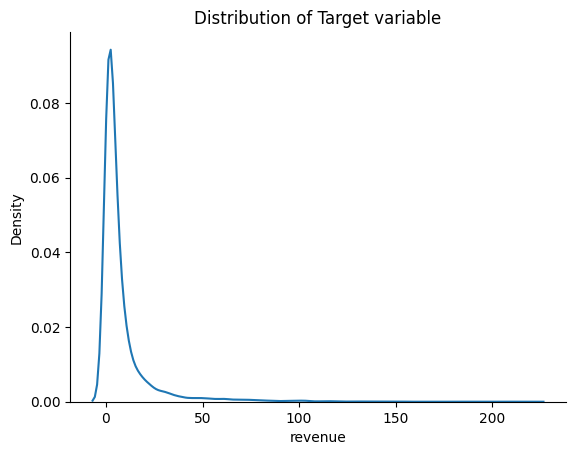

In [766]:
sns.distplot(train_data['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine() # removes top and right border from the figure

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/v4/l760qmd51vl3yg0k0ly6n5fw0000gn/T/ipykernel_4439/3849053235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_data['revenue']),hist=False)


Text(0.5, 1.0, 'Distribution of Target variable')

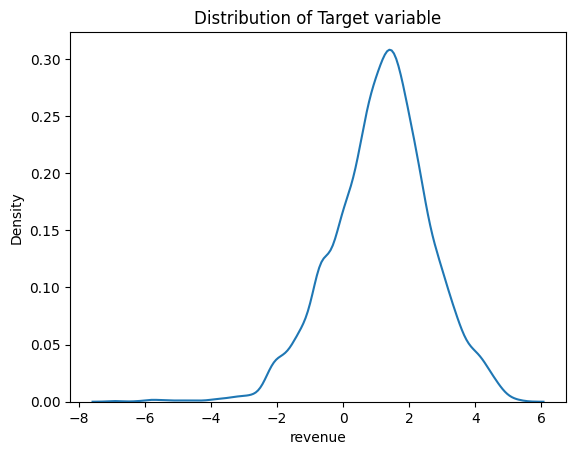

In [767]:
sns.distplot(np.log(train_data['revenue']),hist=False)
plt.title('Distribution of Target variable')

In [768]:
# The data is ≈ normally distributed when plotted in log

In [769]:
# Make new column for less specified plaace hierarchy to group data together
train_data.isnull().sum().sum()
train_data = pd.merge(train_data, plaace_hierarchy[['plaace_hierarchy_id', 'lv1', 'lv2', 'lv3']], on='plaace_hierarchy_id', how='outer')
train_data.isnull().sum().sum()

126

<AxesSubplot: xlabel='lv2', ylabel='count'>

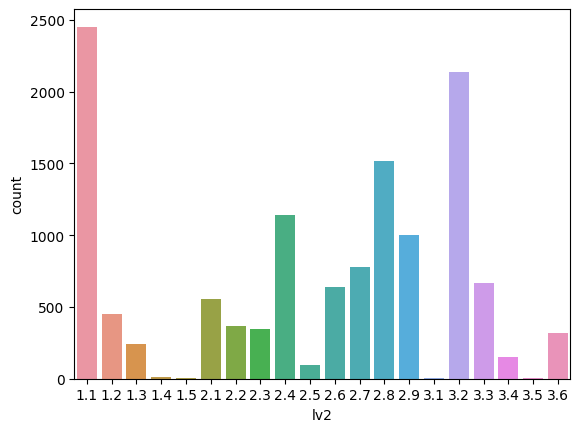

In [770]:
sns.countplot(x=train_data["lv2"])

In [771]:
train_data['lv2'].value_counts()

1.1    2453
3.2    2138
2.8    1516
2.4    1143
2.9    1001
2.7     781
3.3     667
2.6     637
2.1     553
1.2     451
2.2     364
2.3     344
3.6     318
1.3     239
3.4     152
2.5      95
1.4      13
3.5       5
3.1       4
1.5       3
Name: lv2, dtype: int64

In [772]:
train_data.groupby('lv2')['revenue'].mean()
# hierarchy seems to affect the revenue
# Problem: why NaN on 1.5 and 3.1?

lv2
1.1     5.838152
1.2     4.927947
1.3     5.898410
1.4     3.952769
1.5          NaN
2.1    12.202720
2.2    16.096934
2.3     9.210148
2.4     4.996741
2.5     3.844558
2.6     7.839873
2.7     6.620996
2.8    25.573357
2.9     7.614967
3.1          NaN
3.2     2.281237
3.3     4.441008
3.4     2.092629
3.5     0.000000
3.6     3.812314
Name: revenue, dtype: float64

In [773]:
train_data['lv2'].value_counts()

1.1    2453
3.2    2138
2.8    1516
2.4    1143
2.9    1001
2.7     781
3.3     667
2.6     637
2.1     553
1.2     451
2.2     364
2.3     344
3.6     318
1.3     239
3.4     152
2.5      95
1.4      13
3.5       5
3.1       4
1.5       3
Name: lv2, dtype: int64

In [774]:
train_data['chain_name'].value_counts()
# 307 different ones, create dummy variables will give too many columns

No chain                9122
REMA FRANCHISE NORGE     273
JOKER                    164
MIX                      121
CIRCLE K DETALJIST       116
                        ... 
SVANE KJØKKEN              1
COMFORT                    1
PREGO 4701                 1
HUSFLIDEN                  1
SDR NORWAY                 1
Name: chain_name, Length: 307, dtype: int64

In [775]:
train_data['grunnkrets_id'].value_counts()
# 3817 different ones, group together somehow? Municipality?

10010802.0    86
3010306.0     75
3010205.0     64
16011204.0    61
2310803.0     54
              ..
12460203.0     1
18680203.0     1
12240104.0     1
2191506.0      1
19021302.0     1
Name: grunnkrets_id, Length: 3817, dtype: int64

In [776]:
train_data['mall_name'].value_counts()
# 488 different ones, but 10579 of the stores are not in a mall
# => make dummy variable: one column with 1 for mall and 0 for no mall

No mall                   10579
Strømmen Storsenter          39
Sandvika Storsenter          26
Amfi Moa                     26
Kvadrat                      21
                          ...  
Farsund Senter                1
Sigdalsenteret                1
Centrum Varehus               1
Dalsenteret                   1
Rosenlund Bydelssenter        1
Name: mall_name, Length: 488, dtype: int64

In [777]:
# Dummy variable for mall or no mall

# This makes dummy variables for each mall with 1 and 0
# mall_dummy = pd.get_dummies(train_data['mall_name'],drop_first=True)
# train_data = pd.concat([train_data,mall_dummy],axis=1)
# train_data.drop(['mall_name'],axis=1, inplace=True)

train_data.loc[train_data['mall_name'].str.contains("No mall", na=False),'mall_dummy'] = 0
train_data.loc[~(train_data['mall_name'].str.contains("No mall", na=False)),'mall_dummy'] = 1
train_data.drop(['mall_name'],axis=1, inplace=True)


In [778]:
# Sum together the number of people in each grunnkrets
grunnkrets_age = grunnkrets_age.drop_duplicates(subset=['grunnkrets_id'], keep='last') # if there is value for 2016 we keep it, otherwise 2015
grunnkrets_age = grunnkrets_age.fillna(0)
grunnkrets_age = grunnkrets_age.drop('year',axis=1)
grunnkrets_age['grunnkrets_id'] = grunnkrets_age['grunnkrets_id'].astype(str)
grunnkrets_age['total_nbr_people'] = grunnkrets_age.sum(axis=1) # total number of inhabitants
grunnkrets_age['group1'] = grunnkrets_age.iloc[:,1:11].sum(axis=1) # 0-9 years old
grunnkrets_age['group2'] = grunnkrets_age.iloc[:,11:21].sum(axis=1) # 10-19 years old etc
grunnkrets_age['group3'] = grunnkrets_age.iloc[:,21:31].sum(axis=1)
grunnkrets_age['group4'] = grunnkrets_age.iloc[:,31:41].sum(axis=1)
grunnkrets_age['group5'] = grunnkrets_age.iloc[:,41:51].sum(axis=1)
grunnkrets_age['group6'] = grunnkrets_age.iloc[:,51:61].sum(axis=1)
grunnkrets_age['group7'] = grunnkrets_age.iloc[:,61:71].sum(axis=1)
grunnkrets_age['group8'] = grunnkrets_age.iloc[:,71:81].sum(axis=1)
grunnkrets_age['group9'] = grunnkrets_age.iloc[:,81:92].sum(axis=1) # 80-90 years old
grunnkrets_age['grunnkrets_id'] = grunnkrets_age['grunnkrets_id'].astype(int)

train_data = pd.merge(train_data, grunnkrets_age[['grunnkrets_id', 'total_nbr_people', 'group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7', 'group8', 'group9']], on='grunnkrets_id', how='left')
# print(train_data.isnull().sum().sum())
# Problem: We get lots of NaN

/var/folders/v4/l760qmd51vl3yg0k0ly6n5fw0000gn/T/ipykernel_4439/799129080.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grunnkrets_age['total_nbr_people'] = grunnkrets_age.sum(axis=1) # total number of inhabitants


In [779]:
# Number of people per store type (lv2) and grunnkrets

# In dataframe grunnkrets_stripped, add column for number of stores total
number_stores = train_data['grunnkrets_id'].value_counts().rename_axis('grunnkrets_id').reset_index(name='store_counts_total') # Not including NaN (stores without a grunnkrets_id)
grunnkrets_stripped = pd.merge(grunnkrets_stripped, number_stores[['grunnkrets_id', 'store_counts_total']], on='grunnkrets_id', how='left')
grunnkrets_stripped.store_counts_total = grunnkrets_stripped.store_counts_total.fillna(0)

# Different way to do the above, same result
# grunnkrets_stripped['number_stores_total'] = 0
# for i in range(len(number_stores)):
#     id = number_stores._get_value(i,'grunnkrets_id')
#     nbr = number_stores._get_value(i,'counts')
#     grunnkrets_stripped['number_stores_total'].mask(grunnkrets_stripped['grunnkrets_id'] == id, nbr, inplace=True)

# In dataframe grunnkrets_stripped, add column for number of people in the grunnkrets
grunnkrets_stripped = pd.merge(grunnkrets_stripped, grunnkrets_age[['grunnkrets_id', 'total_nbr_people']], on='grunnkrets_id', how='left')

# In dataframe grunnkrets_stripped, add column for number of people per store in total
grunnkrets_stripped['nbr_people_per_store_in_grunnkrets'] = grunnkrets_stripped['total_nbr_people']/grunnkrets_stripped['store_counts_total']

# In dataframe train_data, add column for number of people per store in total
train_data = pd.merge(train_data, grunnkrets_stripped[['grunnkrets_id', 'nbr_people_per_store_in_grunnkrets']], on='grunnkrets_id', how='left')


# In dataframe grunnkrets_stripped, add column for number of stores in each category in lv2
# In dataframe grunnkrets_stripped, add column for number of people per store in each category in lv2
# In dataframe train_data, add column for number of people per store in each category in lv2 in each grunnkrets


In [780]:
train_data.head()

,store_id,plaace_hierarchy_id,grunnkrets_id,lat,lon,chain_name,revenue,lv1,lv2,lv3,mall_dummy,total_nbr_people,group1,group2,group3,group4,group5,group6,group7,group8,group9,nbr_people_per_store_in_grunnkrets
0,983540538-974187930-44774,1.1.1.0,6020303.0,59.743104,10.204928,MCDONALDS,17.998,1,1.1,1.1.1,1.0,157.0,13.0,14.0,39.0,30.0,24.0,14.0,10.0,10.0,3.0,3.140000
1,983540538-974187930-44774,1.1.1.0,6020303.0,59.743104,10.204928,MCDONALDS,17.998,1,1.1,1.1.1,1.0,157.0,13.0,14.0,39.0,30.0,24.0,14.0,10.0,10.0,3.0,3.140000
2,987074191-973117734-44755,1.1.1.0,3010306.0,59.913759,10.734031,MCDONALDS,23.828,1,1.1,1.1.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,987074191-973117734-44755,1.1.1.0,3010306.0,59.913759,10.734031,MCDONALDS,23.828,1,1.1,1.1.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,984890265-981157303-64491,1.1.1.0,6050102.0,60.164751,10.254656,BURGER KING,16.099,1,1.1,1.1.1,1.0,372.0,39.0,33.0,89.0,65.0,32.0,30.0,44.0,29.0,11.0,26.571429


In [781]:
# Now we work with the geographical features

In [782]:
# A way to get the zipcode from the lat and lon, based on https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/
# and https://gis.stackexchange.com/questions/352961/convert-lat-lon-to-zip-postal-code-using-python
# # requires pip install geopy in terminal first

import geopy
geolocator = geopy.Nominatim(user_agent="geoapiExercises")

# FIRST ATTEMPT
# train_data.insert(len(train_data.columns),'zipcode', 0)
# # go through the whole columns of lat and lon pairs
# for i in range(train_data.shape[0]):
#     latitude = str(train_data.loc[i]['lat'])
#     longitude = str(train_data.loc[i]['lon'])
#     location = geolocator.reverse(latitude+","+longitude)
#     address = location.raw['address']
#     train_data.loc[i]['zipcode'] = address.get('postcode')
# # now we should have the dataframe with an extra column for zipcodes

# # SECOND ATTEMPT
# def get_zipcode(df, geolocator, lat_field, lon_field):
#     location = geolocator.reverse((df[lat_field], df[lon_field]))
#     return location.raw['address']['postcode']

# zipcodes = train_data.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='lat', lon_field='lon')
# train_data.insert(len(train_data.columns),'zipcode', zipcodes)
# # Now we should have the dataframe train_data with a new column for zipcodes



In [783]:
# IDEAS/TO DO

# Convert categorical columns to numeric
# Split into train and test data set
# Make new column for distance to nearest busstop based on coordinates and busstops_norway.csv
# Make categories for income and age distribution for different grunnkretser, add as columns
# Try the sklearn ML models used in the EDA link from Kaggle

In [784]:
# Buffer